Matplotlib is building the font cache; this may take a moment.


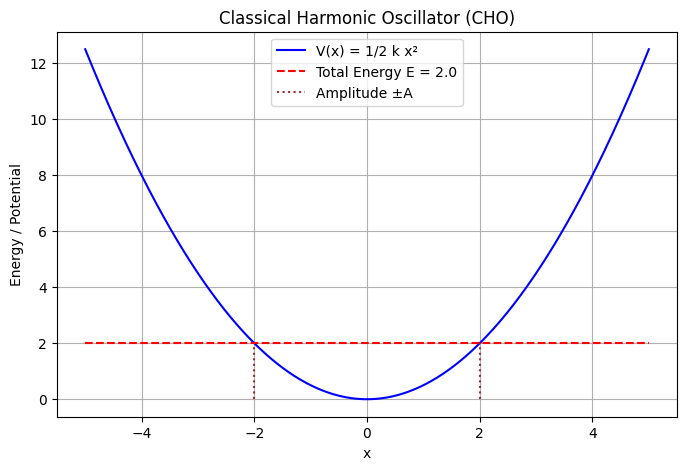

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.0      # force constant
A = 2.0      # amplitude
E_total = 0.5 * k * A**2  # total energy

# Space
x = np.linspace(-5, 5, 500)

# Classical potential
V = 0.5 * k * x**2

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, V, 'b', label='V(x) = 1/2 k x²')
plt.hlines(E_total, x[0], x[-1], colors='r', linestyles='dashed', label=f'Total Energy E = {E_total:.1f}')
plt.vlines([-A, A], 0, E_total, colors='brown', linestyles='dotted', label='Amplitude ±A')
plt.xlabel('x')
plt.ylabel('Energy / Potential')
plt.title('Classical Harmonic Oscillator (CHO)')
plt.legend()
plt.grid(True)
plt.show()

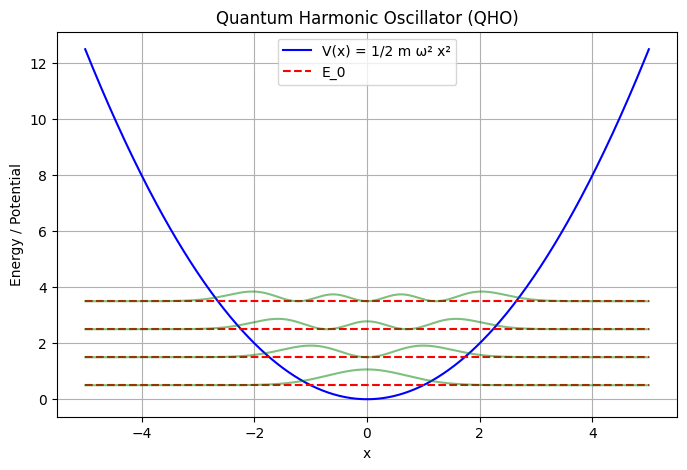

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from math import factorial, sqrt, pi, exp

# Constants
hbar = 1.0
m = 1.0
omega = 1.0

# Space
x = np.linspace(-5, 5, 500)

# Quantum potential
V = 0.5 * m * omega**2 * x**2

# Function for wavefunction (optional)
def psi_n(n, x):
    Hn = hermite(n)
    prefactor = 1.0/sqrt(2**n * factorial(n)) * (m*omega/(pi*hbar))**0.25
    return prefactor * Hn(sqrt(m*omega/hbar) * x) * np.exp(-m*omega*x**2/(2*hbar))

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, V, 'b', label='V(x) = 1/2 m ω² x²')

# Plot first 4 quantum energy levels
for n in range(4):
    E_n = hbar * omega * (n + 0.5)
    plt.hlines(E_n, x[0], x[-1], colors='r', linestyles='dashed', label=f'E_{n}' if n==0 else "")
    psi = psi_n(n, x)
    plt.plot(x, psi**2 + E_n, 'g', alpha=0.5)

plt.xlabel('x')
plt.ylabel('Energy / Potential')
plt.title('Quantum Harmonic Oscillator (QHO)')
plt.legend()
plt.grid(True)
plt.show()

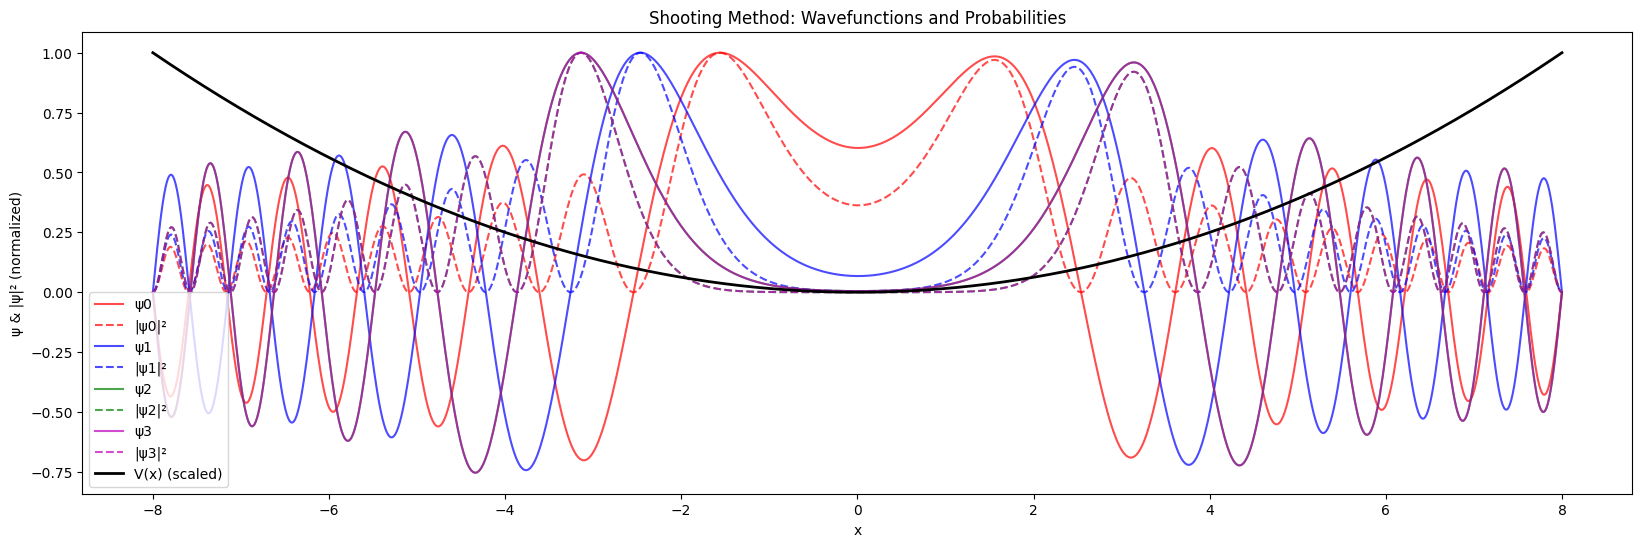

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
m = 1.0
omega = 1.0
hbar = 1.0

x_min, x_max = -8.0, 8.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

V = 0.5 * m * omega**2 * x**2

# -----------------------------
# Shooting function (symmetric)
# -----------------------------
def shoot_symmetric(E, dx, V):
    psi = np.zeros(len(V))
    mid = len(V)//2
    psi[mid] = 1e-5
    psi[mid+1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    psi[mid-1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    
    for i in range(mid+1, len(V)-1):
        psi[i+1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i-1]
    for i in range(mid-1, 0, -1):
        psi[i-1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i+1]
    return psi

def find_energy(n, E_min, E_max, tol=1e-6):
    for _ in range(1000):
        E_mid = (E_min + E_max)/2
        psi_mid = shoot_symmetric(E_mid, dx, V)
        psi_min = shoot_symmetric(E_min, dx, V)
        if np.sign(psi_mid[-1]) == np.sign(psi_min[-1]):
            E_min = E_mid
        else:
            E_max = E_mid
        if abs(E_max - E_min) < tol:
            break
    return E_mid

# -----------------------------
# Compute Shooting wavefunctions
# -----------------------------
shooting_psi = []
shooting_prob = []
for n in range(4):
    E = find_energy(n, n, n+2)
    psi = shoot_symmetric(E, dx, V)
    psi /= np.max(np.abs(psi))
    shooting_psi.append(psi)
    prob = psi**2
    prob /= np.max(prob)
    shooting_prob.append(prob)

# -----------------------------
# Plot Shooting Results (Wave + Probability)
# -----------------------------
colors = ['r', 'b', 'g', 'm']
plt.figure(figsize=(20,6))

for i in range(4):
    plt.plot(x, shooting_psi[i], linestyle='-', color=colors[i], alpha=0.7, label=f'ψ{i}')
    plt.plot(x, shooting_prob[i], linestyle='--', color=colors[i], alpha=0.7, label=f'|ψ{i}|²')

plt.plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
plt.title("Shooting Method: Wavefunctions and Probabilities")
plt.xlabel("x")
plt.ylabel("ψ & |ψ|² (normalized)")
plt.legend()
plt.show()


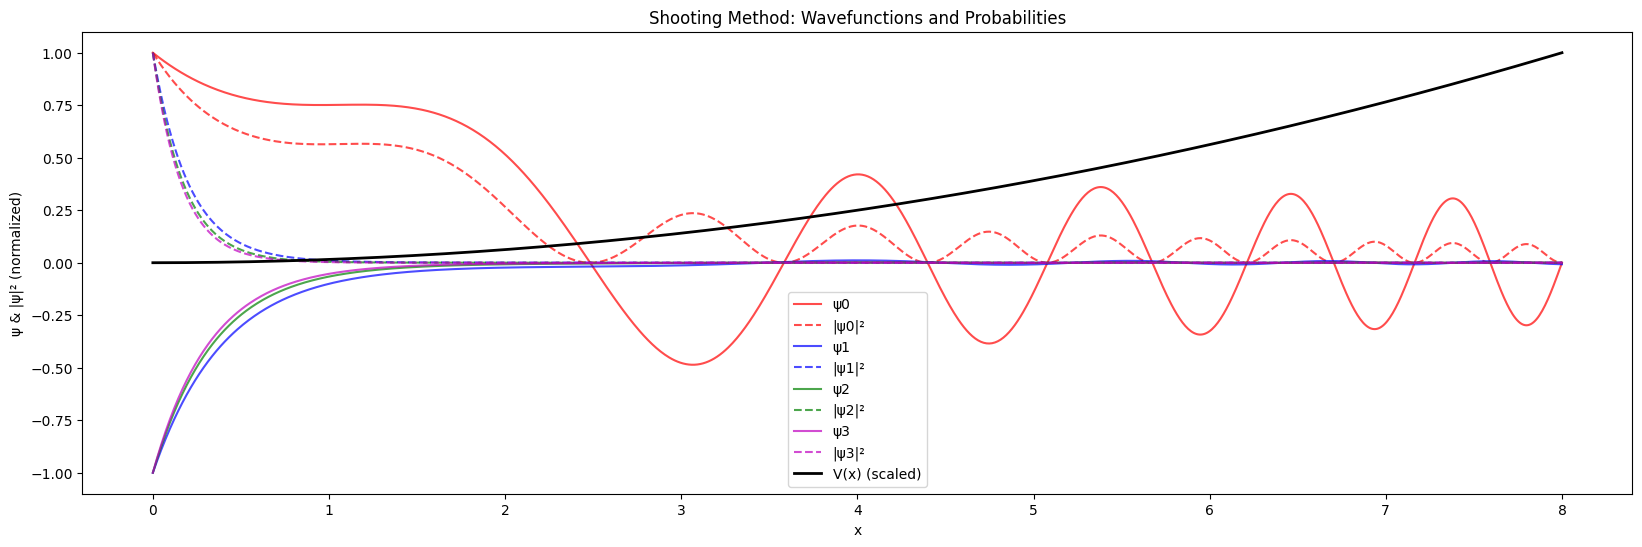

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
m = 1.0
omega = 1.0
hbar = 1.0

x_min, x_max = 0.0, 8.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

V = 0.5 * m * omega**2 * x**2

# -----------------------------
# Shooting function (symmetric)
# -----------------------------
def shoot_symmetric(E, dx, V):
    psi = np.zeros(len(V))
    mid = len(V)//2
    psi[mid] = 1e-5
    psi[mid+1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    psi[mid-1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    
    for i in range(mid+1, len(V)-1):
        psi[i+1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i-1]
    for i in range(mid-1, 0, -1):
        psi[i-1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i+1]
    return psi

def find_energy(n, E_min, E_max, tol=1e-6):
    for _ in range(1000):
        E_mid = (E_min + E_max)/2
        psi_mid = shoot_symmetric(E_mid, dx, V)
        psi_min = shoot_symmetric(E_min, dx, V)
        if np.sign(psi_mid[-1]) == np.sign(psi_min[-1]):
            E_min = E_mid
        else:
            E_max = E_mid
        if abs(E_max - E_min) < tol:
            break
    return E_mid

# -----------------------------
# Compute Shooting wavefunctions
# -----------------------------
shooting_psi = []
shooting_prob = []
for n in range(4):
    E = find_energy(n, n, n+2)
    psi = shoot_symmetric(E, dx, V)
    psi /= np.max(np.abs(psi))
    shooting_psi.append(psi)
    prob = psi**2
    prob /= np.max(prob)
    shooting_prob.append(prob)

# -----------------------------
# Plot Shooting Results (Wave + Probability)
# -----------------------------
colors = ['r', 'b', 'g', 'm']
plt.figure(figsize=(20,6))

for i in range(4):
    plt.plot(x, shooting_psi[i], linestyle='-', color=colors[i], alpha=0.7, label=f'ψ{i}')
    plt.plot(x, shooting_prob[i], linestyle='--', color=colors[i], alpha=0.7, label=f'|ψ{i}|²')

plt.plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
plt.title("Shooting Method: Wavefunctions and Probabilities")
plt.xlabel("x")
plt.ylabel("ψ & |ψ|² (normalized)")
plt.legend()
plt.show()


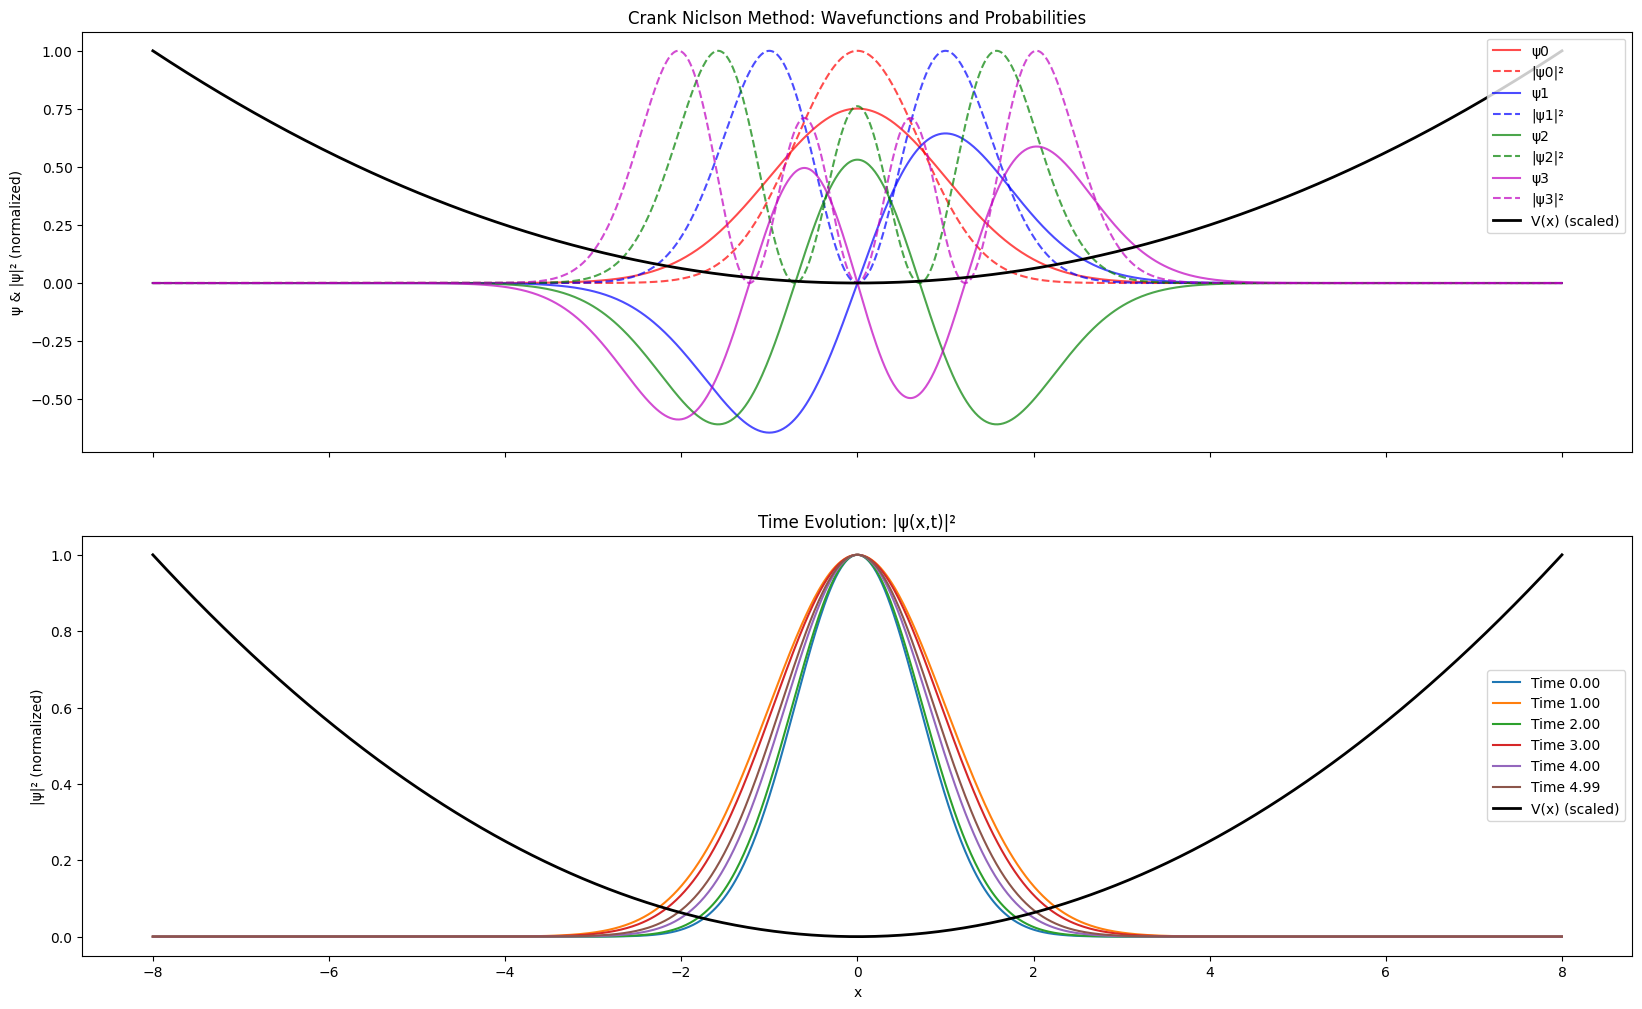

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu
from scipy.linalg import eigh

# -----------------------------
# Parameters
# -----------------------------
m = 1.0
omega = 1.0
hbar = 1.0

x_min, x_max = -8.0, 8.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

V = 0.5 * m * omega**2 * x**2

# -----------------------------
# Crank Niclson method (stationary states)
# -----------------------------
kinetic_coeff = -hbar**2 / (2 * m * dx**2)
diagonals = [np.full(N-1, kinetic_coeff),
             np.full(N, -2*kinetic_coeff) + V,
             np.full(N-1, kinetic_coeff)]
H = diags(diagonals, offsets=[-1,0,1]).toarray()
eigenvalues, eigenvectors = eigh(H)

eigen_psi = []
eigen_prob = []
for i in range(4):
    psi = eigenvectors[:, i]
    psi /= np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    eigen_psi.append(psi)
    prob = np.abs(psi)**2
    prob /= np.max(prob)
    eigen_prob.append(prob)

# -----------------------------
# Time evolution (Crank-Nicolson)
# -----------------------------
t_final = 5.0
num_time_steps = 500
dt = t_final / num_time_steps

psi_time = np.exp(-x**2 / 2.0) / np.pi**0.25

alpha = 1j * hbar * dt / (2 * m * dx**2)
beta = 1j * dt / (2 * hbar)

main_diag_A = 1 + 2*alpha + beta*V
off_diag_A = -alpha * np.ones(N-1)
A = diags([off_diag_A, main_diag_A, off_diag_A], [-1,0,1]).tocsc()

main_diag_B = 1 - 2*alpha - beta*V
off_diag_B = alpha * np.ones(N-1)
B = diags([off_diag_B, main_diag_B, off_diag_B], [-1,0,1]).tocsc()

A_LU = splu(A)

# -----------------------------
# Plot Eigen & Time Evolution (Wave + Probability)
# -----------------------------
colors = ['r', 'b', 'g', 'm']
fig, axs = plt.subplots(2, 1, figsize=(20,12), sharex=True)

# Wavefunctions
for i in range(4):
    axs[0].plot(x, eigen_psi[i], linestyle='-', color=colors[i], alpha=0.7, label=f'ψ{i}')
    axs[0].plot(x, eigen_prob[i], linestyle='--', color=colors[i], alpha=0.7, label=f'|ψ{i}|²')
axs[0].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[0].set_title("Crank Niclson Method: Wavefunctions and Probabilities")
axs[0].set_ylabel("ψ & |ψ|² (normalized)")
axs[0].legend()

# Time evolution probabilities
for n in range(num_time_steps):
    psi_time = A_LU.solve(B @ psi_time)
    psi_time /= np.sqrt(np.trapezoid(np.abs(psi_time)**2, x))
    
    if n % 100 == 0 or n == num_time_steps-1:
        prob = np.abs(psi_time)**2
        prob /= np.max(prob)
        axs[1].plot(x, prob, label=f'Time {n*dt:.2f}')

axs[1].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[1].set_title("Time Evolution: |ψ(x,t)|²")
axs[1].set_xlabel("x")
axs[1].set_ylabel("|ψ|² (normalized)")
axs[1].legend()

plt.show()


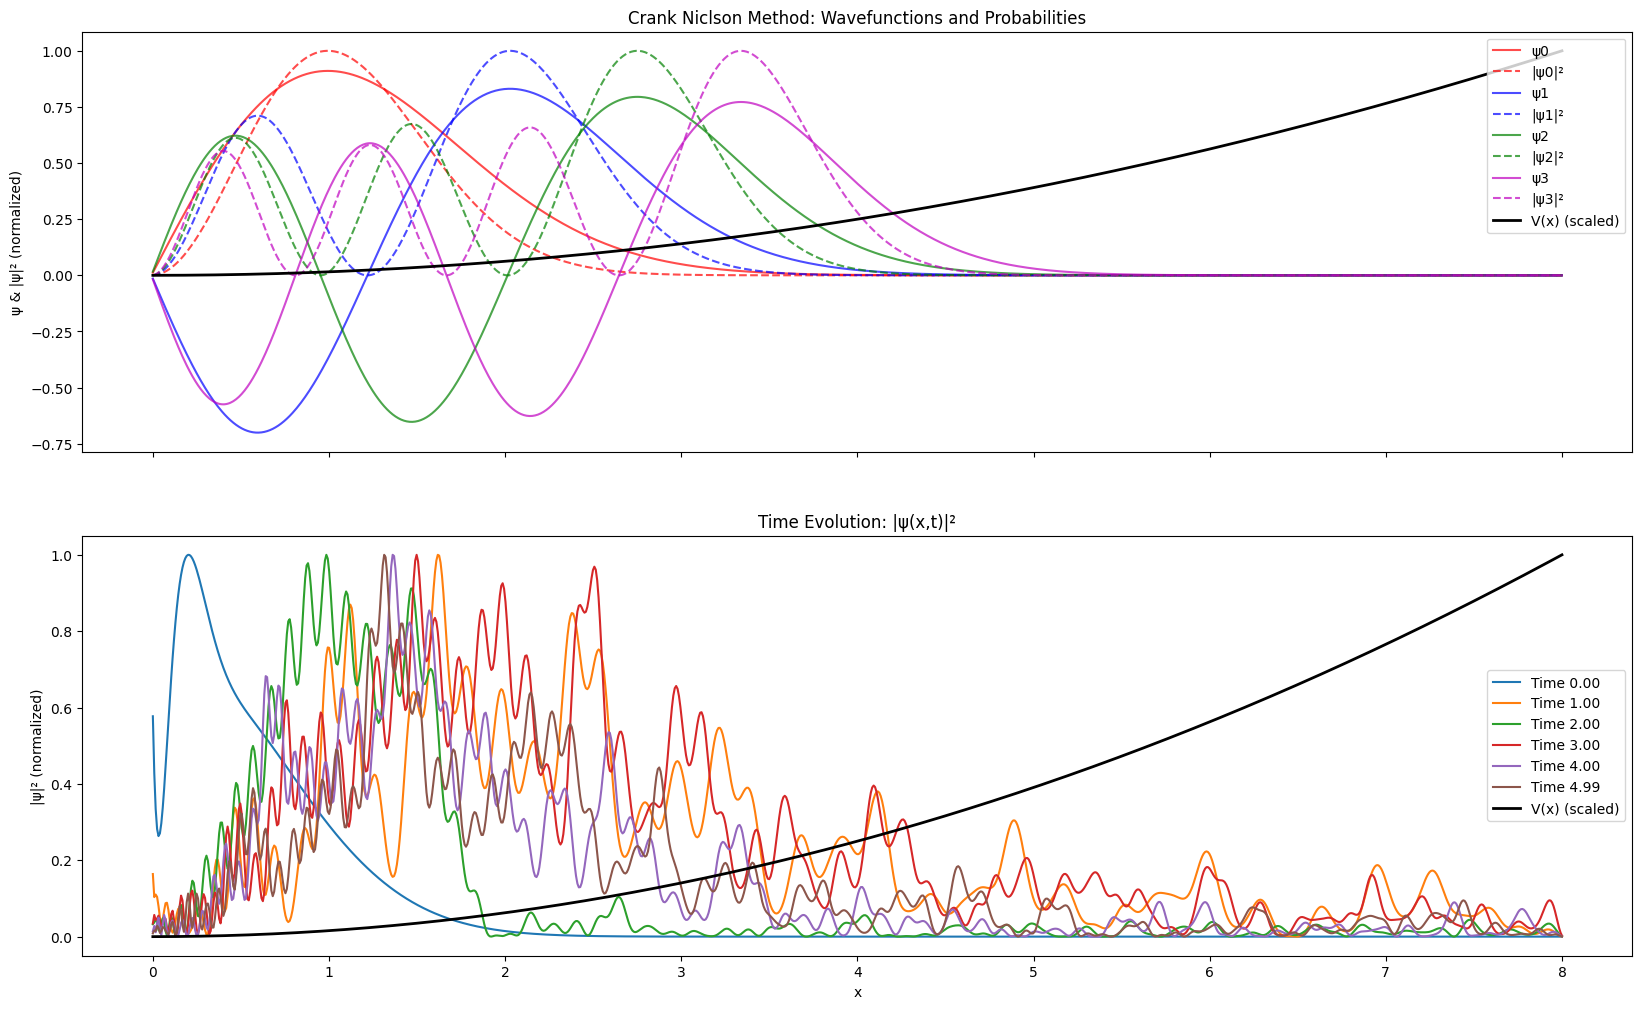

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu
from scipy.linalg import eigh

# -----------------------------
# Parameters
# -----------------------------
m = 1.0
omega = 1.0
hbar = 1.0

x_min, x_max = 0.0, 8.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

V = 0.5 * m * omega**2 * x**2

# -----------------------------
# Eigen method (stationary states)
# -----------------------------
kinetic_coeff = -hbar**2 / (2 * m * dx**2)
diagonals = [np.full(N-1, kinetic_coeff),
             np.full(N, -2*kinetic_coeff) + V,
             np.full(N-1, kinetic_coeff)]
H = diags(diagonals, offsets=[-1,0,1]).toarray()
eigenvalues, eigenvectors = eigh(H)

eigen_psi = []
eigen_prob = []
for i in range(4):
    psi = eigenvectors[:, i]
    psi /= np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    eigen_psi.append(psi)
    prob = np.abs(psi)**2
    prob /= np.max(prob)
    eigen_prob.append(prob)

# -----------------------------
# Time evolution (Crank-Nicolson)
# -----------------------------
t_final = 5.0
num_time_steps = 500
dt = t_final / num_time_steps

psi_time = np.exp(-x**2 / 2.0) / np.pi**0.25

alpha = 1j * hbar * dt / (2 * m * dx**2)
beta = 1j * dt / (2 * hbar)

main_diag_A = 1 + 2*alpha + beta*V
off_diag_A = -alpha * np.ones(N-1)
A = diags([off_diag_A, main_diag_A, off_diag_A], [-1,0,1]).tocsc()

main_diag_B = 1 - 2*alpha - beta*V
off_diag_B = alpha * np.ones(N-1)
B = diags([off_diag_B, main_diag_B, off_diag_B], [-1,0,1]).tocsc()

A_LU = splu(A)

# -----------------------------
# Plot Eigen & Time Evolution (Wave + Probability)
# -----------------------------
colors = ['r', 'b', 'g', 'm']
fig, axs = plt.subplots(2, 1, figsize=(20,12), sharex=True)

# Wavefunctions
for i in range(4):
    axs[0].plot(x, eigen_psi[i], linestyle='-', color=colors[i], alpha=0.7, label=f'ψ{i}')
    axs[0].plot(x, eigen_prob[i], linestyle='--', color=colors[i], alpha=0.7, label=f'|ψ{i}|²')
axs[0].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[0].set_title("Crank Niclson Method: Wavefunctions and Probabilities")
axs[0].set_ylabel("ψ & |ψ|² (normalized)")
axs[0].legend()

# Time evolution probabilities
for n in range(num_time_steps):
    psi_time = A_LU.solve(B @ psi_time)
    psi_time /= np.sqrt(np.trapezoid(np.abs(psi_time)**2, x))
    
    if n % 100 == 0 or n == num_time_steps-1:
        prob = np.abs(psi_time)**2
        prob /= np.max(prob)
        axs[1].plot(x, prob, label=f'Time {n*dt:.2f}')

axs[1].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[1].set_title("Time Evolution: |ψ(x,t)|²")
axs[1].set_xlabel("x")
axs[1].set_ylabel("|ψ|² (normalized)")
axs[1].legend()

plt.show()


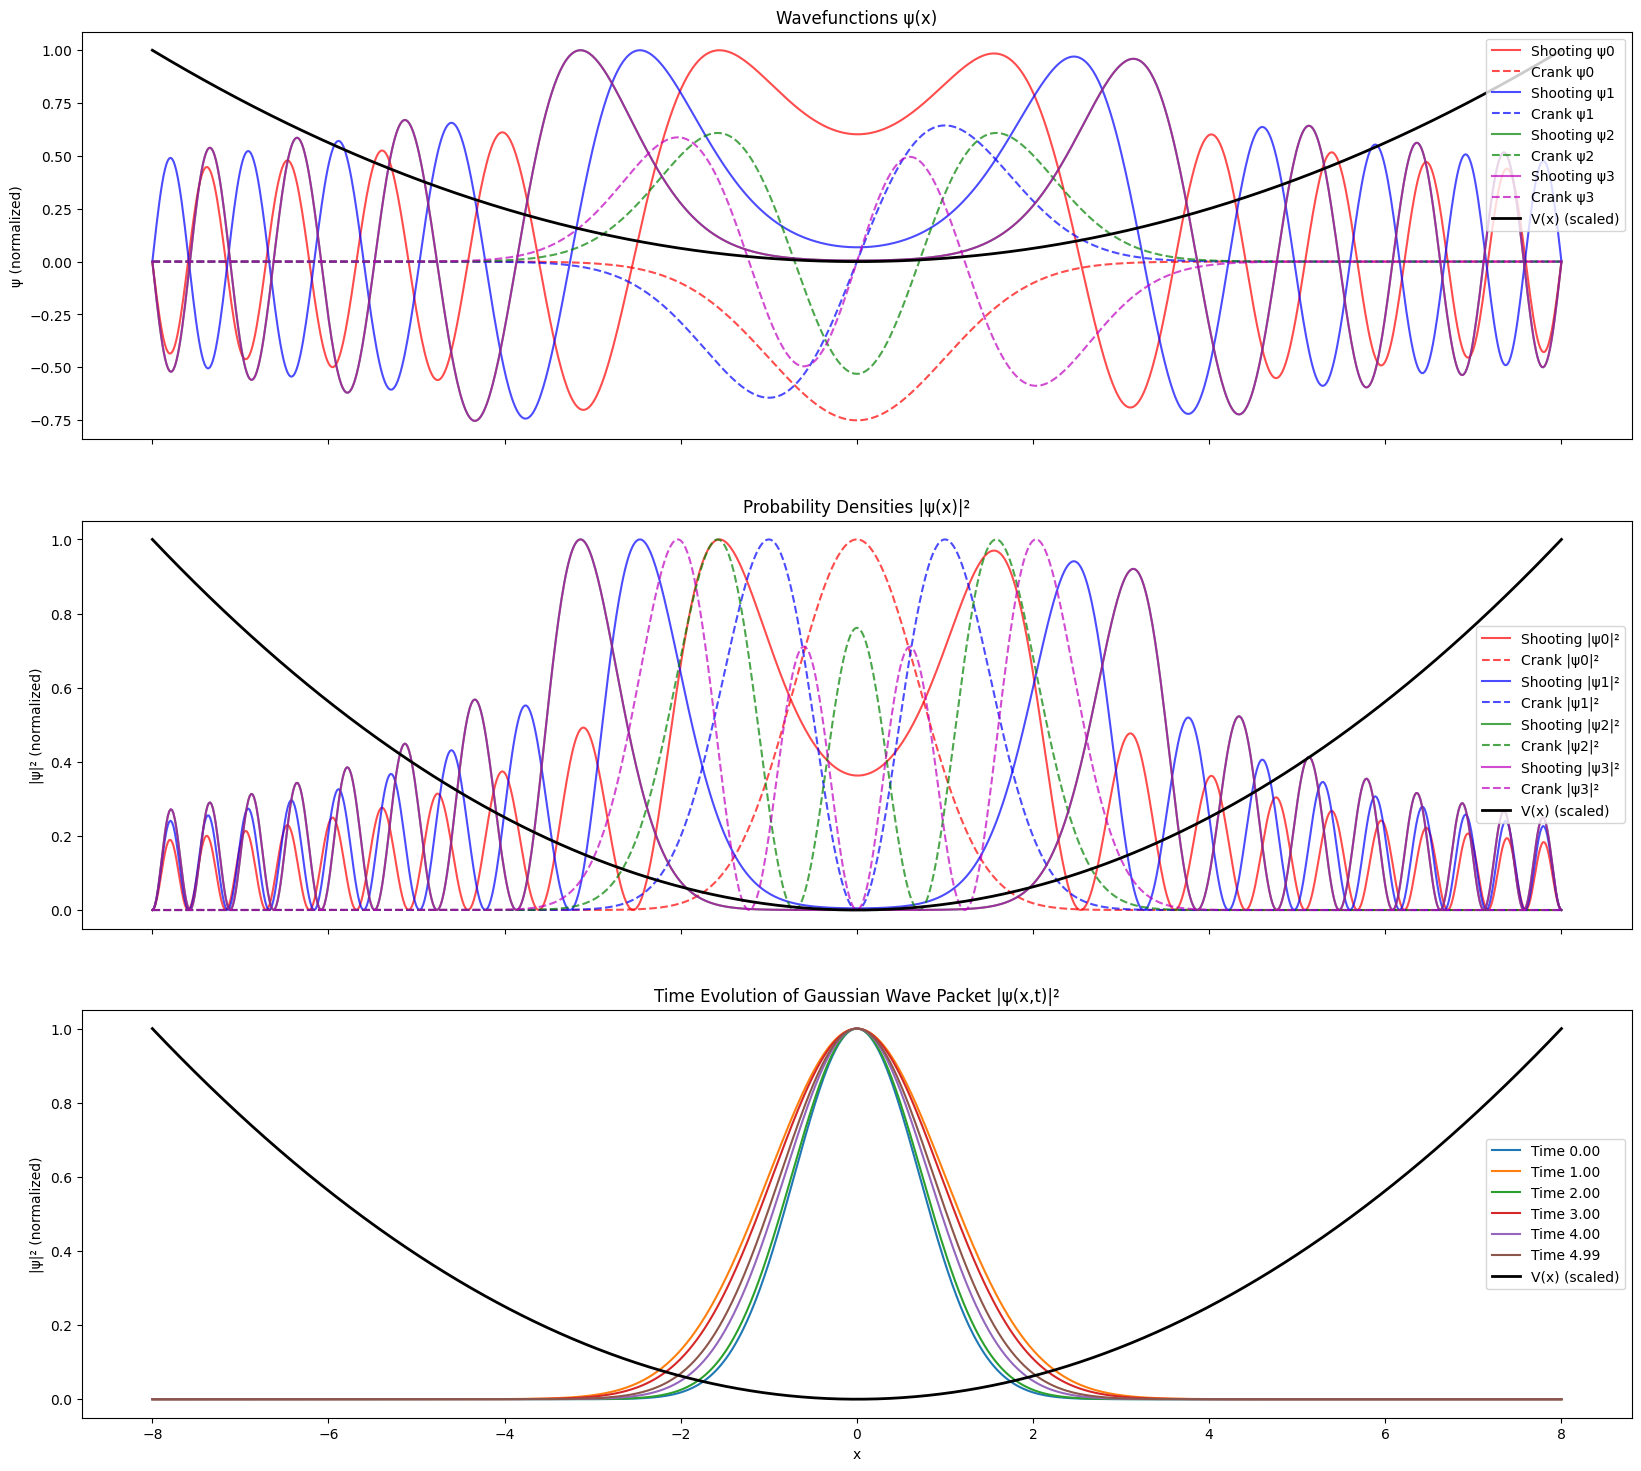

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu

# -----------------------------
# Parameters
# -----------------------------
m = 1.0
omega = 1.0
hbar = 1.0

x_min, x_max = -8.0, 8.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

V = 0.5 * m * omega**2 * x**2

# -----------------------------
# Shooting function (symmetric)
# -----------------------------
def shoot_symmetric(E, dx, V):
    psi = np.zeros(len(V))
    mid = len(V)//2
    psi[mid] = 1e-5
    psi[mid+1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    psi[mid-1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    
    for i in range(mid+1, len(V)-1):
        psi[i+1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i-1]
    for i in range(mid-1, 0, -1):
        psi[i-1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i+1]
    return psi

def find_energy(n, E_min, E_max, tol=1e-6):
    for _ in range(1000):
        E_mid = (E_min + E_max)/2
        psi_mid = shoot_symmetric(E_mid, dx, V)
        psi_min = shoot_symmetric(E_min, dx, V)
        if np.sign(psi_mid[-1]) == np.sign(psi_min[-1]):
            E_min = E_mid
        else:
            E_max = E_mid
        if abs(E_max - E_min) < tol:
            break
    return E_mid

# -----------------------------
# Shooting wavefunctions
# -----------------------------
shooting_psi = []
shooting_prob = []
for n in range(4):
    E = find_energy(n, n, n+2)
    psi = shoot_symmetric(E, dx, V)
    psi /= np.max(np.abs(psi))
    shooting_psi.append(psi)
    prob = psi**2
    prob /= np.max(prob)
    shooting_prob.append(prob)

# -----------------------------
# Crank-Nicolson / Eigen method
# -----------------------------
kinetic_coeff = -hbar**2 / (2 * m * dx**2)
diagonals = [np.full(N-1, kinetic_coeff),
             np.full(N, -2*kinetic_coeff) + V,
             np.full(N-1, kinetic_coeff)]
H = diags(diagonals, offsets=[-1,0,1]).toarray()
eigenvalues, eigenvectors = np.linalg.eigh(H)
eigen_psi = []
eigen_prob = []
for i in range(4):
    psi = eigenvectors[:, i]
    psi /= np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    eigen_psi.append(psi)
    prob = np.abs(psi)**2
    prob /= np.max(prob)
    eigen_prob.append(prob)

# -----------------------------
# Time evolution parameters
# -----------------------------
t_final = 5.0
num_time_steps = 500
dt = t_final / num_time_steps

# Initial Gaussian wave packet
psi_time = np.exp(-x**2 / 2.0) / np.pi**0.25

alpha = 1j * hbar * dt / (2 * m * dx**2)
beta = 1j * dt / (2 * hbar)

main_diag_A = 1 + 2*alpha + beta*V
off_diag_A = -alpha * np.ones(N-1)
A = diags([off_diag_A, main_diag_A, off_diag_A], [-1, 0, 1]).tocsc()

main_diag_B = 1 - 2*alpha - beta*V
off_diag_B = alpha * np.ones(N-1)
B = diags([off_diag_B, main_diag_B, off_diag_B], [-1, 0, 1]).tocsc()

A_LU = splu(A)

# -----------------------------
# Plot setup
# -----------------------------
colors = ['r', 'b', 'g', 'm']

fig, axs = plt.subplots(3, 1, figsize=(20,18), sharex=True)

# Wavefunctions
for i in range(4):
    axs[0].plot(x, shooting_psi[i], linestyle='-', color=colors[i], alpha=0.7, label=f'Shooting ψ{i}')
    axs[0].plot(x, eigen_psi[i], linestyle='--', color=colors[i], alpha=0.7, label=f'Crank ψ{i}')
axs[0].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[0].set_title("Wavefunctions ψ(x)")
axs[0].set_ylabel("ψ (normalized)")
axs[0].legend()

# Probabilities
for i in range(4):
    axs[1].plot(x, shooting_prob[i], linestyle='-', color=colors[i], alpha=0.7, label=f'Shooting |ψ{i}|²')
    axs[1].plot(x, eigen_prob[i], linestyle='--', color=colors[i], alpha=0.7, label=f'Crank |ψ{i}|²')
axs[1].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[1].set_title("Probability Densities |ψ(x)|²")
axs[1].set_ylabel("|ψ|² (normalized)")
axs[1].legend()

# Time evolution
for n in range(num_time_steps):
    psi_time = A_LU.solve(B @ psi_time)
    psi_time /= np.sqrt(np.trapezoid(np.abs(psi_time)**2, x))
    
    if n % 100 == 0 or n == num_time_steps-1:
        prob = np.abs(psi_time)**2
        prob /= np.max(prob)
        axs[2].plot(x, prob, label=f'Time {n*dt:.2f}')

axs[2].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[2].set_title("Time Evolution of Gaussian Wave Packet |ψ(x,t)|²")
axs[2].set_xlabel("x")
axs[2].set_ylabel("|ψ|² (normalized)")
axs[2].legend()

plt.show()


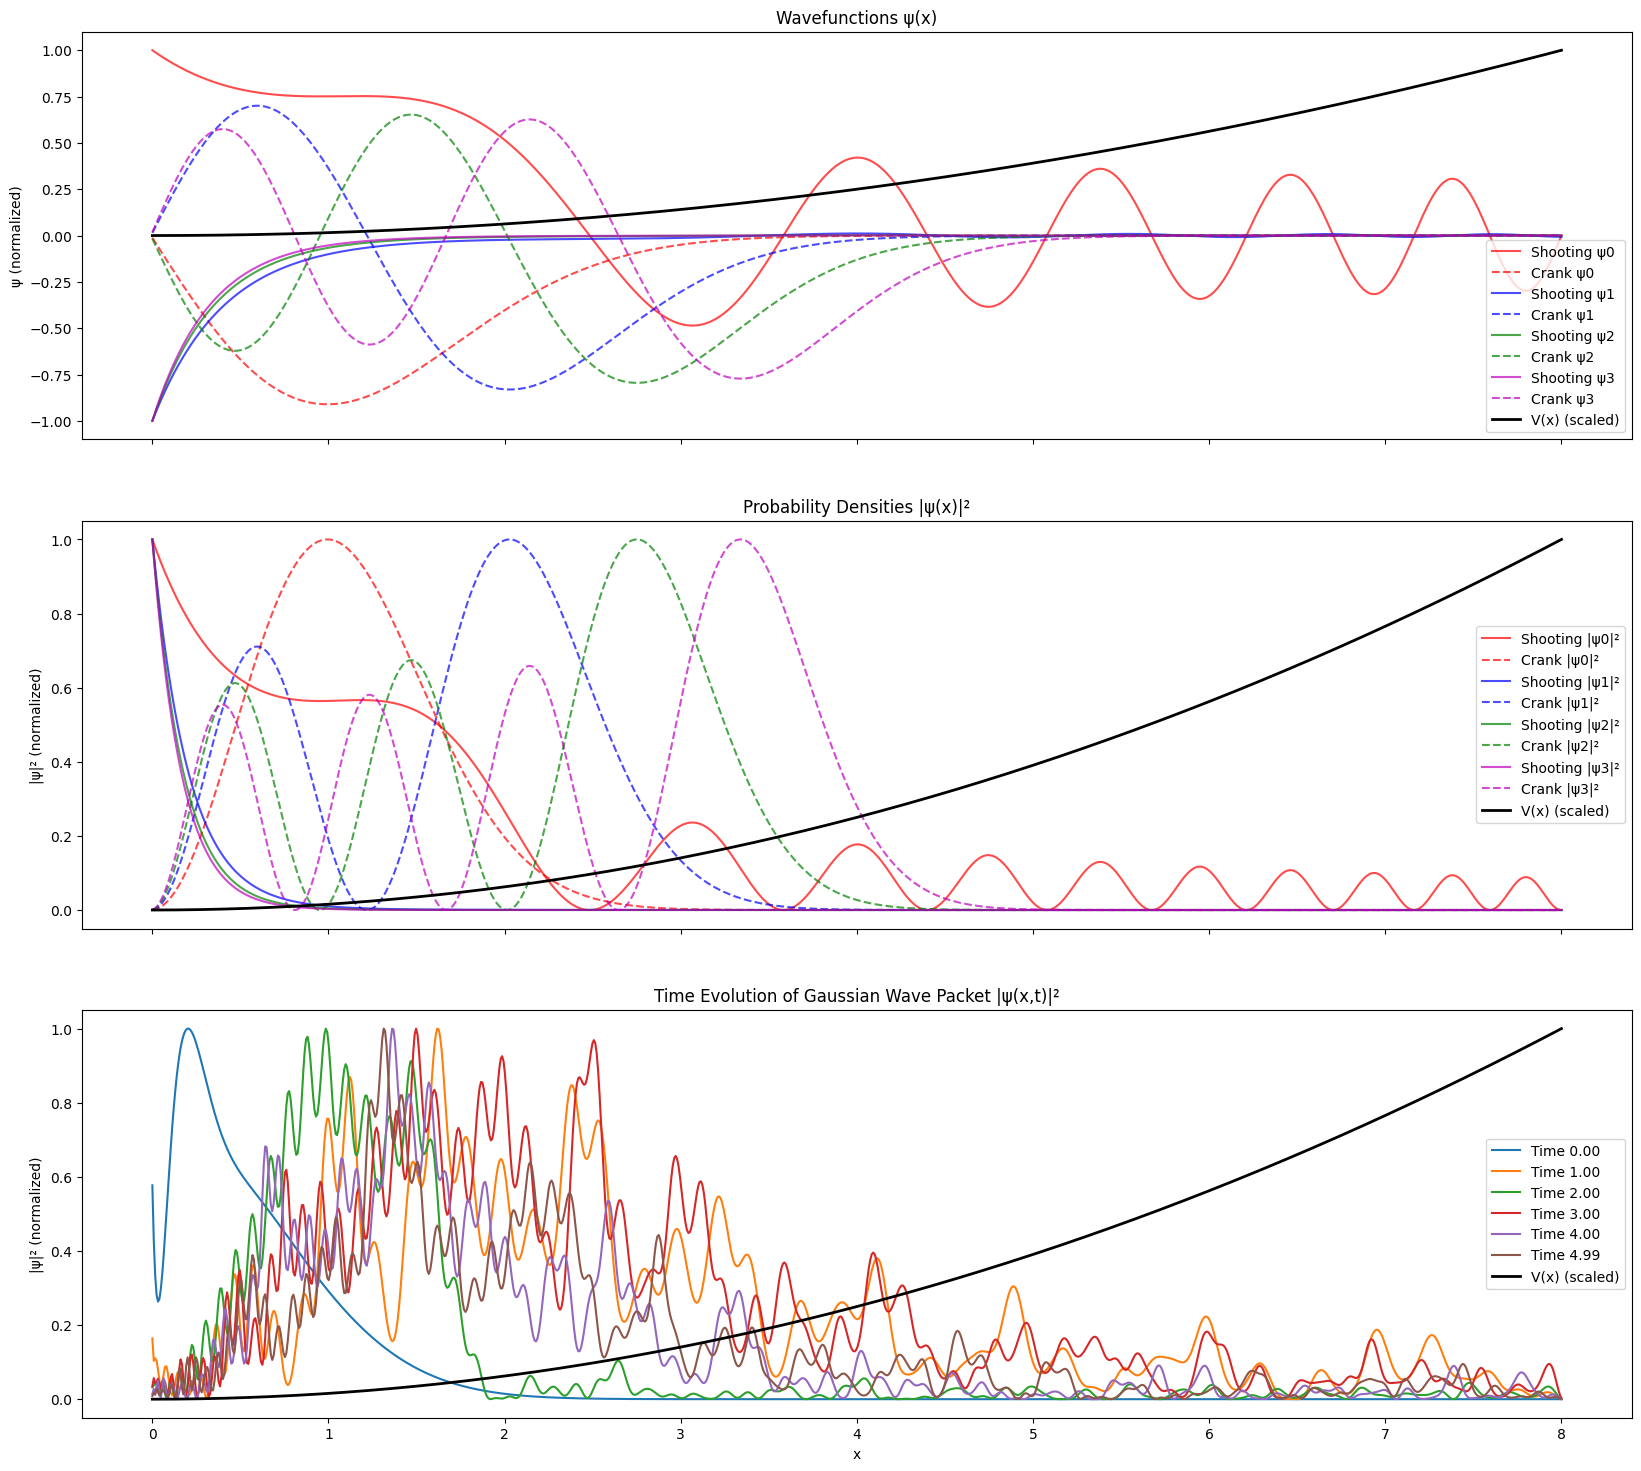

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu

# -----------------------------
# Parameters
# -----------------------------
m = 1.0
omega = 1.0
hbar = 1.0

x_min, x_max = 0.0, 8.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

V = 0.5 * m * omega**2 * x**2

# -----------------------------
# Shooting function (symmetric)
# -----------------------------
def shoot_symmetric(E, dx, V):
    psi = np.zeros(len(V))
    mid = len(V)//2
    psi[mid] = 1e-5
    psi[mid+1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    psi[mid-1] = psi[mid]*(1 - dx**2*(V[mid]-E))
    
    for i in range(mid+1, len(V)-1):
        psi[i+1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i-1]
    for i in range(mid-1, 0, -1):
        psi[i-1] = 2*(1 - dx**2*(V[i]-E))*psi[i] - psi[i+1]
    return psi

def find_energy(n, E_min, E_max, tol=1e-6):
    for _ in range(1000):
        E_mid = (E_min + E_max)/2
        psi_mid = shoot_symmetric(E_mid, dx, V)
        psi_min = shoot_symmetric(E_min, dx, V)
        if np.sign(psi_mid[-1]) == np.sign(psi_min[-1]):
            E_min = E_mid
        else:
            E_max = E_mid
        if abs(E_max - E_min) < tol:
            break
    return E_mid

# -----------------------------
# Shooting wavefunctions
# -----------------------------
shooting_psi = []
shooting_prob = []
for n in range(4):
    E = find_energy(n, n, n+2)
    psi = shoot_symmetric(E, dx, V)
    psi /= np.max(np.abs(psi))
    shooting_psi.append(psi)
    prob = psi**2
    prob /= np.max(prob)
    shooting_prob.append(prob)

# -----------------------------
# Crank-Nicolson / Eigen method
# -----------------------------
kinetic_coeff = -hbar**2 / (2 * m * dx**2)
diagonals = [np.full(N-1, kinetic_coeff),
             np.full(N, -2*kinetic_coeff) + V,
             np.full(N-1, kinetic_coeff)]
H = diags(diagonals, offsets=[-1,0,1]).toarray()
eigenvalues, eigenvectors = np.linalg.eigh(H)
eigen_psi = []
eigen_prob = []
for i in range(4):
    psi = eigenvectors[:, i]
    psi /= np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    eigen_psi.append(psi)
    prob = np.abs(psi)**2
    prob /= np.max(prob)
    eigen_prob.append(prob)

# -----------------------------
# Time evolution parameters
# -----------------------------
t_final = 5.0
num_time_steps = 500
dt = t_final / num_time_steps

# Initial Gaussian wave packet
psi_time = np.exp(-x**2 / 2.0) / np.pi**0.25

alpha = 1j * hbar * dt / (2 * m * dx**2)
beta = 1j * dt / (2 * hbar)

main_diag_A = 1 + 2*alpha + beta*V
off_diag_A = -alpha * np.ones(N-1)
A = diags([off_diag_A, main_diag_A, off_diag_A], [-1, 0, 1]).tocsc()

main_diag_B = 1 - 2*alpha - beta*V
off_diag_B = alpha * np.ones(N-1)
B = diags([off_diag_B, main_diag_B, off_diag_B], [-1, 0, 1]).tocsc()

A_LU = splu(A)

# -----------------------------
# Plot setup
# -----------------------------
colors = ['r', 'b', 'g', 'm']

fig, axs = plt.subplots(3, 1, figsize=(20,18), sharex=True)

# Wavefunctions
for i in range(4):
    axs[0].plot(x, shooting_psi[i], linestyle='-', color=colors[i], alpha=0.7, label=f'Shooting ψ{i}')
    axs[0].plot(x, eigen_psi[i], linestyle='--', color=colors[i], alpha=0.7, label=f'Crank ψ{i}')
axs[0].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[0].set_title("Wavefunctions ψ(x)")
axs[0].set_ylabel("ψ (normalized)")
axs[0].legend()

# Probabilities
for i in range(4):
    axs[1].plot(x, shooting_prob[i], linestyle='-', color=colors[i], alpha=0.7, label=f'Shooting |ψ{i}|²')
    axs[1].plot(x, eigen_prob[i], linestyle='--', color=colors[i], alpha=0.7, label=f'Crank |ψ{i}|²')
axs[1].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[1].set_title("Probability Densities |ψ(x)|²")
axs[1].set_ylabel("|ψ|² (normalized)")
axs[1].legend()

# Time evolution
for n in range(num_time_steps):
    psi_time = A_LU.solve(B @ psi_time)
    psi_time /= np.sqrt(np.trapezoid(np.abs(psi_time)**2, x))
    
    if n % 100 == 0 or n == num_time_steps-1:
        prob = np.abs(psi_time)**2
        prob /= np.max(prob)
        axs[2].plot(x, prob, label=f'Time {n*dt:.2f}')

axs[2].plot(x, V/np.max(V), 'k', linewidth=2, label='V(x) (scaled)')
axs[2].set_title("Time Evolution of Gaussian Wave Packet |ψ(x,t)|²")
axs[2].set_xlabel("x")
axs[2].set_ylabel("|ψ|² (normalized)")
axs[2].legend()

plt.show()
